In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [ ]:
prize_prob = 0.045

result = np.random.choice(np.arange(0, 4), 
                          p=[prize_prob, prize_prob, prize_prob, 1-prize_prob*3], 
                          size=(10000))

array([3, 3, 3, ..., 3, 3, 1])

In [ ]:
idx, counts = np.unique(result, return_counts=True)
idx, counts

(array([0, 1, 2, 3]), array([ 441,  453,  456, 8650]))

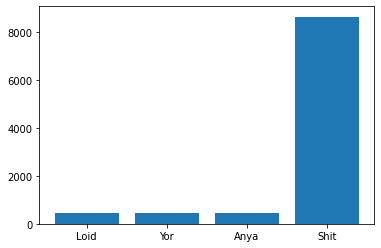

In [ ]:
plt.bar(["Loid", "Yor", "Anya", "Shit"], counts)
plt.show()

In [ ]:
# 250
def stop(pool):
    return pool[0] > 0 and pool[1] > 0 and pool[2]

def draw(prize_prob):
    result = np.random.choice(np.arange(0, 4), 
                              p=[prize_prob, prize_prob, prize_prob, 1-prize_prob*3])
    return result

def redeem(pool):
    not_own = np.where(np.array(pool) == 0)[0]
    return np.random.choice(not_own)

def draw_round(prize_prob):
    draw_id = 0
    pool = [0, 0, 0, 0]
    coins = 100

    while(not stop(pool)):
        card_id = draw(prize_prob)
        draw_id += 1
        coins += 10
        pool[card_id] += 1
        if draw_id % 10 == 0:
            coins += 30
        
        if stop(pool):
            pool[np.random.choice([0, 1, 2])] += 1
            return draw_id, pool

        if coins == 250:
            card_id = redeem(pool)
            pool[card_id] += 1
            coins -= 250
    return draw_id, pool

In [ ]:
probs = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009 ,0.01, 0.02, 0.03, 0.045, 0.05, 0.1]
ROUNDS = 10000
avg_stones = []

for p in probs:
    total_stones = 0    
    for i in tqdm(range(ROUNDS)):
        draw_times, _ = draw_round(p)
        stones = draw_times * 5
        total_stones += stones

    avg_stones.append(total_stones / ROUNDS )

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

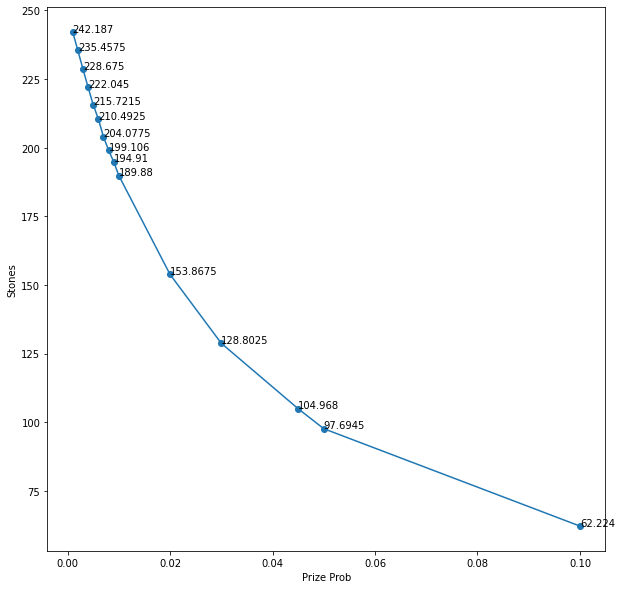

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(probs, avg_stones, marker="o")
for a,b in zip(probs, avg_stones): 
    plt.text(a, b, str(b))
plt.xlabel('Prize Prob')
plt.ylabel('Stones')
plt.show()

In [ ]:
for p, s in zip(probs, avg_stones):
    print(p, s)

0.001 242.187
0.002 235.4575
0.003 228.675
0.004 222.045
0.005 215.7215
0.006 210.4925
0.007 204.0775
0.008 199.106
0.009 194.91
0.01 189.88
0.02 153.8675
0.03 128.8025
0.045 104.968
0.05 97.6945
0.1 62.224
